# Naive Bayes Classification using Wine data (UCI ML Repo)

The [Naive Bayes Classifier](http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/) technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

### Bayes' Theorem

The algorithm is based on the famous [___Bayes theorem___](https://en.wikipedia.org/wiki/Bayes%27_theorem) named after Rev. Thomas Bayes. It works on conditional probability. [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) is the probability that something will happen, given that something else has already occurred. Using the conditional probability, we can calculate the probability of an event using its prior knowledge.

Bayes' theorem is stated mathematically as the following equation:

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$
where $A$ and $B$ are events and $P(B)\neq{0}$.

$P(A\mid B)$ is a [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability): the likelihood of event $A$ occurring given that $B$ is true.

$P(B\mid A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.

$P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the [marginal probability](https://en.wikipedia.org/wiki/Marginal_probability).

### What's _Naive_ in Naive Bayes and why is it a super fast algorithm?

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value, they are assumed to be conditionally independent given the target value.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

Training is fast because only the probability of each class and the probability of each class given different input values need to be calculated. **No coefficients need to be fitted by optimization procedures.**

The class probabilities are simply the frequency of instances that belong to each class divided by the total number of instances. The conditional probabilities are the frequency of each attribute value for a given class value divided by the frequency of instances with that class value.

### Data analyzed in this notebook

In this notebook, we will show how to use Python scikit-learn's Naive Bayes method to classify origin of wine based on physio-chemical analysis data. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# Read in the data and perform basic exploratory analysis

In [3]:
df = pd.read_csv('../Datasets/wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.iloc[:, 1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.iloc[:, 1:].keys()

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

### Boxplots by output labels/classes

In [12]:
l = list(df.columns[1:15])
l

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

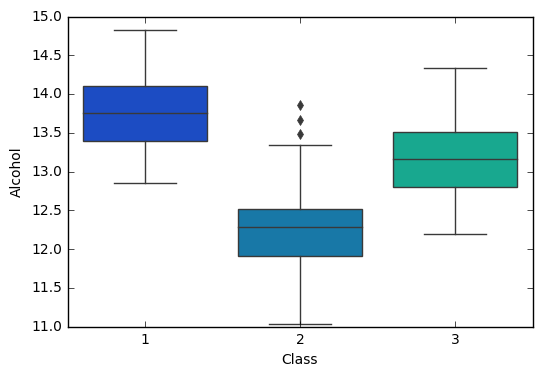

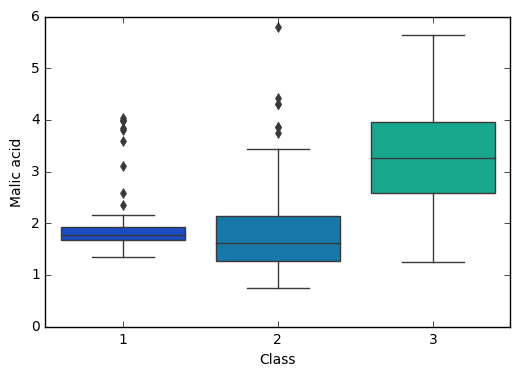

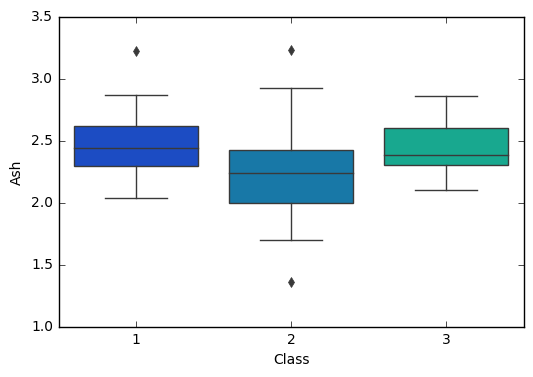

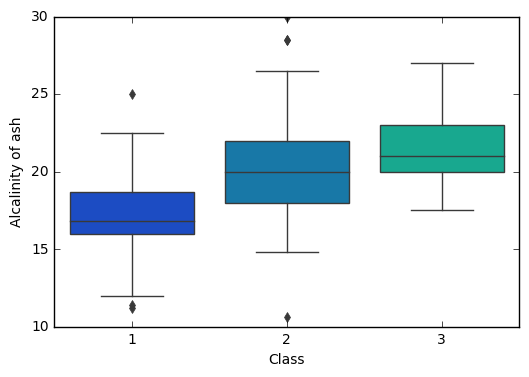

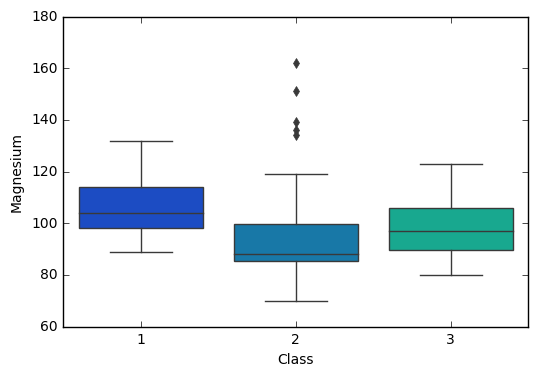

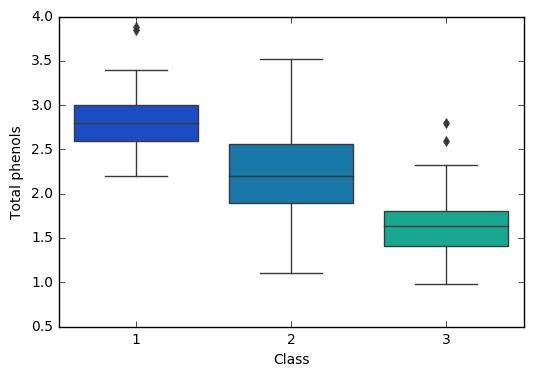

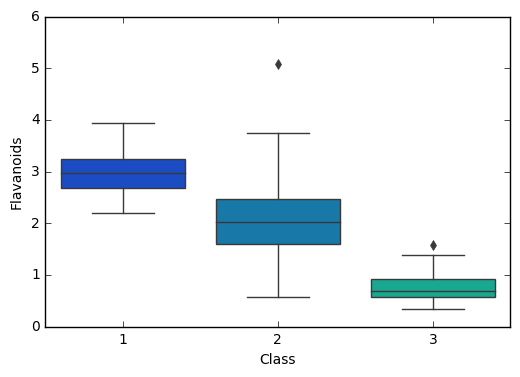

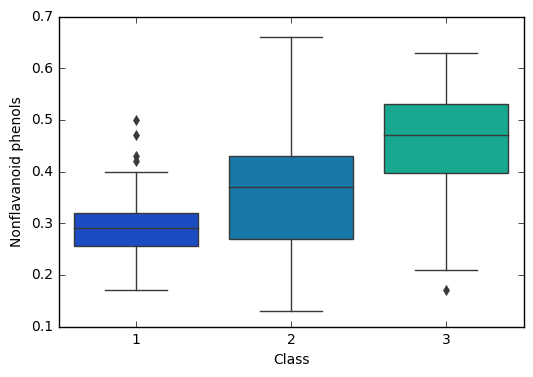

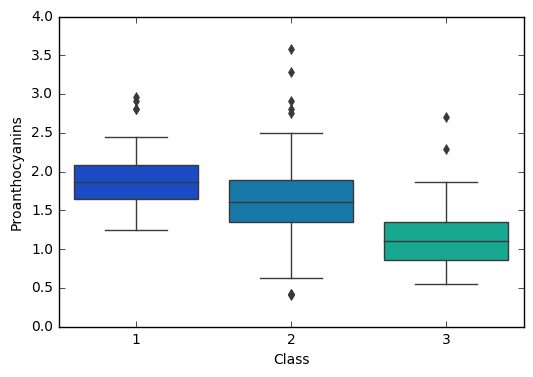

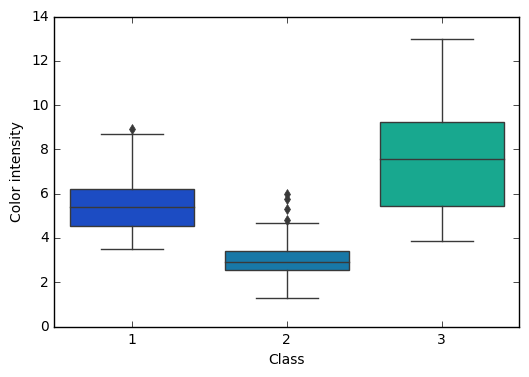

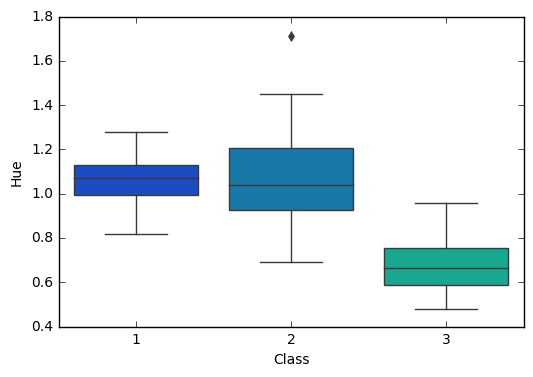

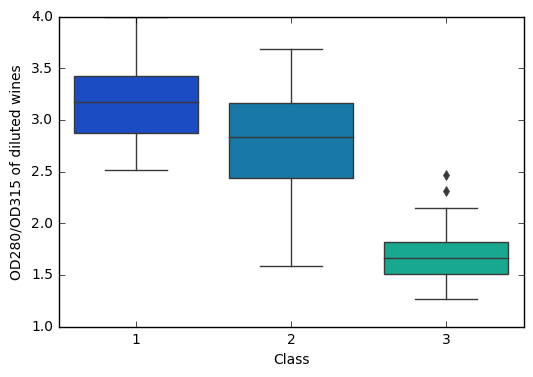

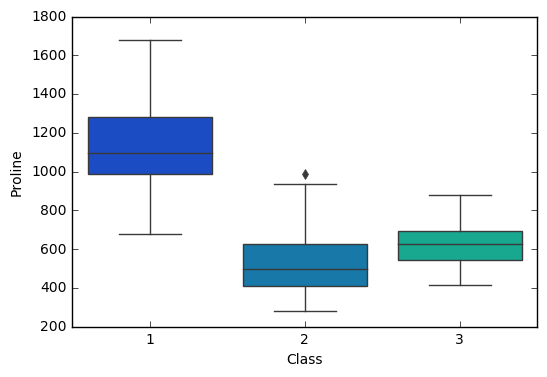

In [15]:
for i in range(len(l)):
    sns.boxplot(x='Class', y=l[i], data=df, palette='winter')
    plt.figure()

**It can be seen that some features classify the wine labels pretty clearly**. For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

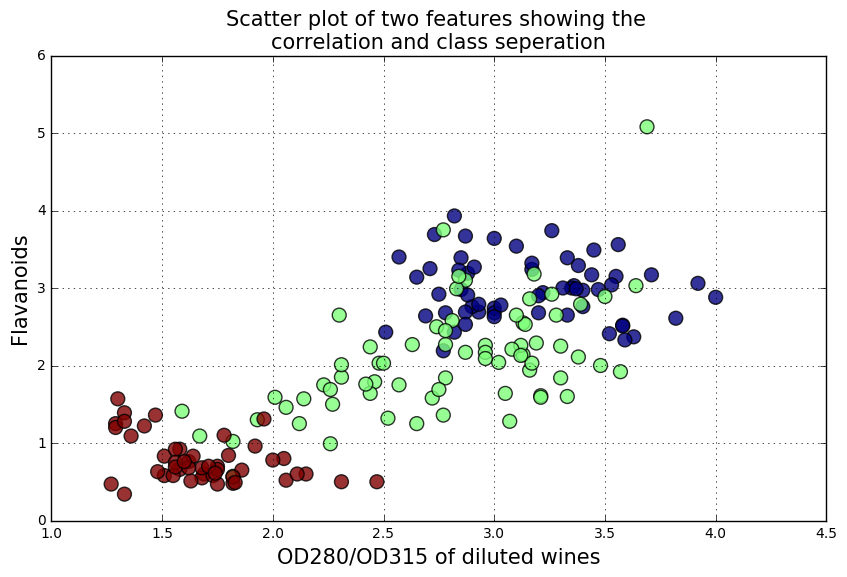

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['OD280/OD315 of diluted wines'], y=df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.8, s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

**Are the features independent? Plot co-variance matrix**

#### It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

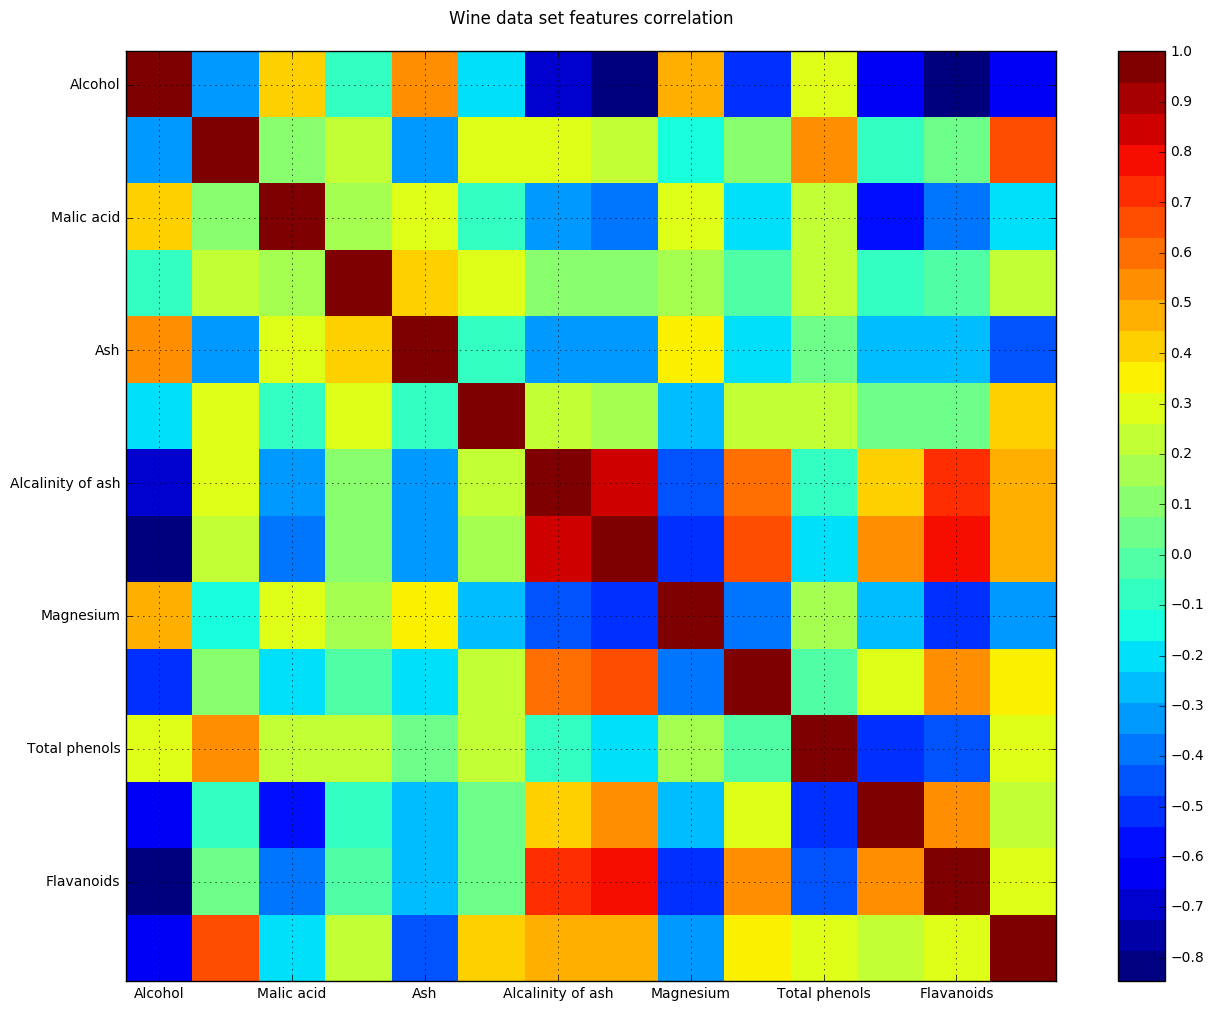

In [18]:
def correlation_matrix(df):
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap(name='jet', lut=30)
    cax = ax1.imshow(df.corr(), interpolation='nearest', cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n')
    labels = df.columns
    ax1.set_xticklabels(labels)
    ax1.set_yticklabels(labels)
    
    # add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()
    
correlation_matrix(df)

In [19]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

# Naive Bayes Classification

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
df_feat = df.drop('Class', axis=1)
df_label = df['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_label, test_size=0.3)

#### Classification using GaussianNB
Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [31]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nbc = GaussianNB()

In [35]:
nbc.fit(X_train, y_train)

GaussianNB(priors=None)

**Prediction, classification report, and confusion matrix**

In [37]:
y_pred = nbc.predict(X_test)
miss_label = np.sum((y_test != y_pred))
miss_label

1

In [38]:
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test), miss_label))

Total number of mislabelled data points from 54 test samples is 1


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          1       1.00      0.95      0.98        22
          2       0.94      1.00      0.97        16
          3       1.00      1.00      1.00        16

avg / total       0.98      0.98      0.98        54

[[21  1  0]
 [ 0 16  0]
 [ 0  0 16]]


In [42]:
cmdf = pd.DataFrame(data=confusion_matrix(y_test, y_pred), 
                    index=['Class 1','Class 2','Class 3'], 
                    columns=['Class 1','Class 2','Class 3'])
cmdf

,Class 1,Class 2,Class 3
Class 1,21,1,0
Class 2,0,16,0
Class 3,0,0,16
